In [1]:
#1. Import library

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"]= (12,8) #adjust the configuration of the plots we will create 

#2. Read data

df=pd.read_csv("movies.csv")

#3. Lets Look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [2]:
#4. lets see  if there is any missing data?

missing_values = df.isnull().sum()
print(missing_values)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [3]:
#5. Check the percentage of missing data in columns

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print("{} - {}%".format(col, round(pct_missing,3)))

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.283%
gross - 0.025%
company - 0.002%
runtime - 0.001%


In [4]:
#6. at first check how many rows are there
df.shape

(7668, 15)

In [5]:
#7. drop missing values where budget and gross are missing
df=df.dropna()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
#8. check how many rows are there in the new dataframe
df.shape

(5421, 15)

In [7]:
#9. check data typed of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#10. budget and gross doesn't need float, convert them to int
df["budget"]=df["budget"].astype(int)
df["gross"]=df["gross"].astype(int)

In [9]:
#11. year column is based on released column, however there could be mistakes,
#so, create a new column which will take the year form released column
df["year_correct"]=df["released"].str.extract(pat="([0-9]{4})").astype(int)

#12. drop previous year column
df.drop('year', axis=1, inplace=True)

#13. Rename columns
df = df.rename(columns={'year_correct': 'year'})



In [10]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [11]:
#14. sort the data based on highest grossing to lowest 
df=df.sort_values(by=["gross"],inplace=False,ascending=False)

In [12]:
#15. Lets check if there is any duplicate movie name

duplicate_movies = df[df['name'].duplicated(keep=False)]
duplicate_movies

#there are 169 rows, where movie names are same. 

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
7480,The Lion King,PG,Animation,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6043,The Avengers,PG-13,Action,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
7072,Beauty and the Beast,PG,Family,"March 17, 2017 (United States)",7.1,283000.0,Bill Condon,Stephen Chbosky,Emma Watson,United States,160000000,1264434525,Mandeville Films,129.0,2017
2448,The Lion King,G,Animation,"June 24, 1994 (United States)",8.5,970000.0,Roger Allers,Irene Mecchi,Matthew Broderick,United States,45000000,1083720877,Walt Disney Pictures,88.0,1994
7481,Aladdin,PG,Adventure,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000,1050693953,Walt Disney Pictures,128.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,Trust,R,Comedy,"September 20, 1991 (United Kingdom)",7.4,9400.0,Hal Hartley,Hal Hartley,Adrienne Shelly,United Kingdom,700000,357400,Channel Four Films,107.0,1991
1976,Under Suspicion,R,Crime,"February 28, 1992 (United States)",6.5,3800.0,Simon Moore,Simon Moore,Liam Neeson,United Kingdom,6000000,221295,Carnival Film & Television,99.0,1992
1403,Pulse,PG-13,Horror,"March 4, 1988 (United States)",5.4,2300.0,Paul Golding,Paul Golding,Cliff De Young,United States,6000000,40397,Aspen Film Society,91.0,1988
2401,Deadfall,R,Crime,"October 8, 1993 (United States)",4.0,3000.0,Christopher Coppola,Christopher Coppola,Michael Biehn,United States,10000000,18369,Trimark Pictures,98.0,1993


In [13]:
#16. Pick a movie name from duplicate dataframe to ovserve the rows

df[df["name"]=="Pet Sematary"]

#Here movie name is same but, release of year is different, meaning they are not same movie

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
7521,Pet Sematary,R,Horror,"April 5, 2019 (United States)",5.7,86000.0,Kevin Kölsch,Stephen King,Jason Clarke,United States,21000000,113118226,Paramount Pictures,101.0,2019
1461,Pet Sematary,R,Fantasy,"April 21, 1989 (United States)",6.6,97000.0,Mary Lambert,Stephen King,Dale Midkiff,United States,11500000,57470138,Paramount Pictures,103.0,1989


In [14]:
#17. It is not wise to check each and every duplicated movie
# Let's identify duplicate movie names while considering the release year, and also budget
# Create a new column combining movie name, budget and release year

df['movie_year_budget'] = df['name'] + ' ' + df['year'].astype(str)+ ' '+df["budget"].astype(str)

#load the dataframe
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year,movie_year_budget
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,Avatar 2009 237000000
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,Avengers: Endgame 2019 356000000
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,Titanic 1997 200000000
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,Star Wars: Episode VII - The Force Awakens 201...
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,Avengers: Infinity War 2018 321000000


In [15]:
#18. Lets check if there is any duplicate movie name

duplicate_movies = df[df['movie_year_budget'].duplicated(keep=False)]
duplicate_movies

#nothing in the dataframe, that means there is no duplicate movies

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year,movie_year_budget


In [16]:
#19. drop the movie_year_budget column
df.drop('movie_year_budget', axis=1, inplace=True)

# load the data
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


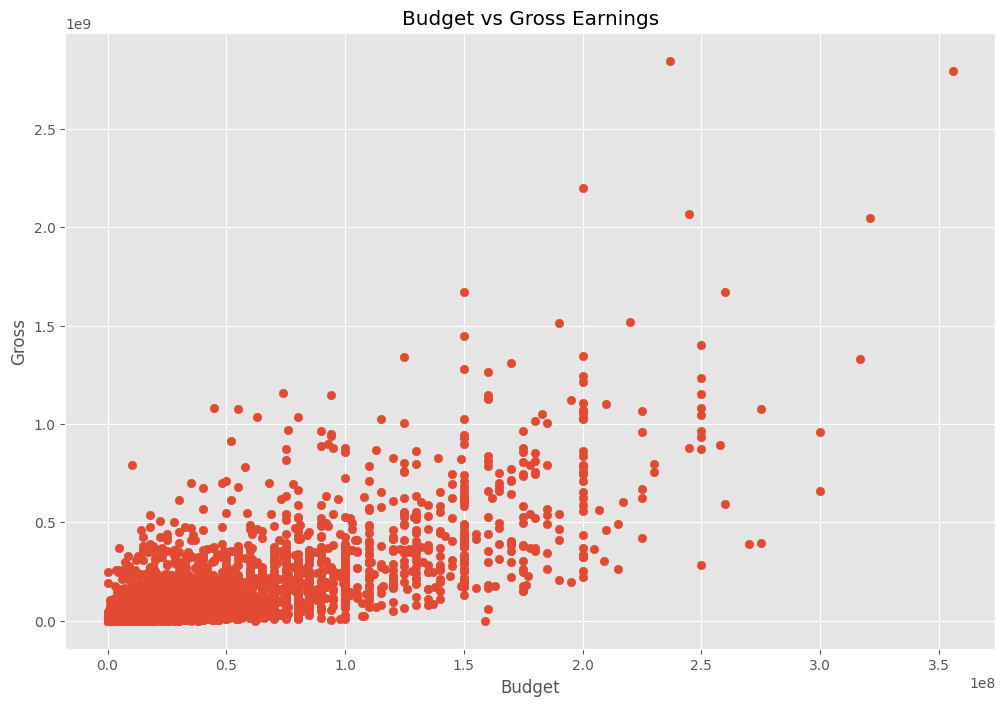

In [17]:
#20. lets start the process to check correlation between gross and budget
#at first draw a scatter plot
plt.scatter(x=df["budget"],y=df["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

In [18]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


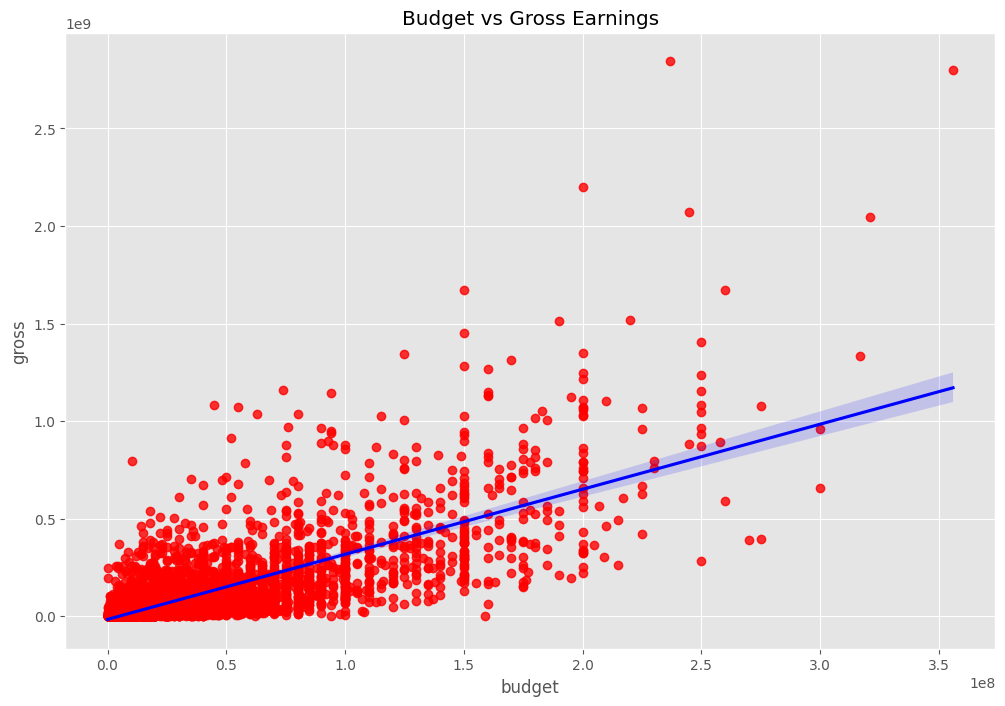

In [19]:
#21. plot budget vs gross using seaborn

sns.regplot(x="budget",y="gross",data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.title("Budget vs Gross Earnings")
plt.show()

In [20]:
#22. Lets look at the correlation
# using directly [df.corr()] causing problem as some columns are non-numeric

numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr(method="pearson") 
correlation_matrix

,score,votes,budget,gross,runtime,year
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


#There is a high correlation between budget and gross

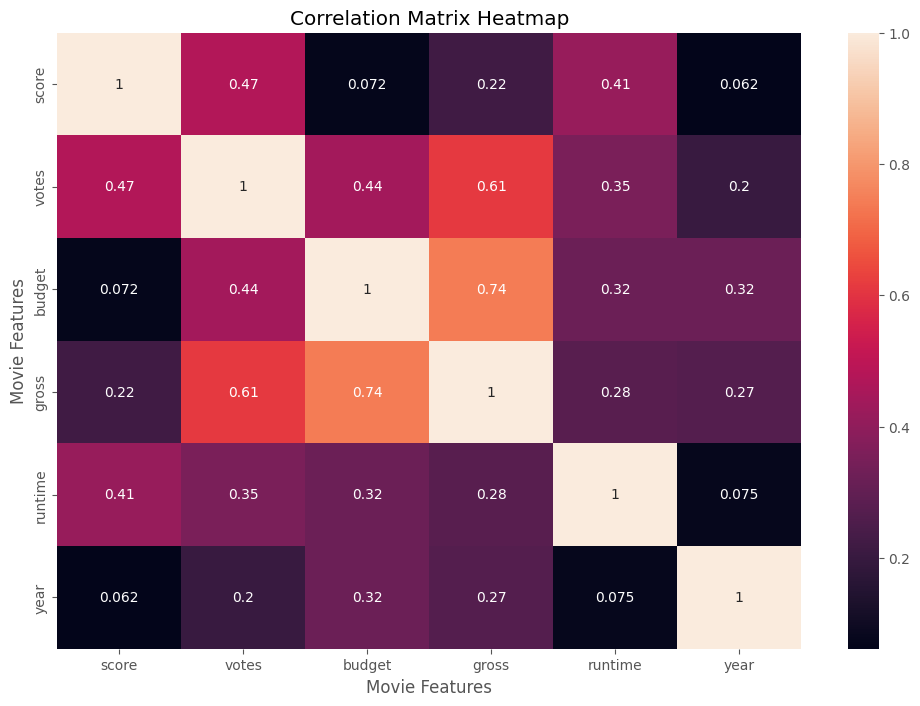

In [21]:
#23. draw a correlation heatmap
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix Heatmap")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

1. There is a moderate positive correlation between the number of votes a movie receives and its gross earnings. This suggests that movies with higher popularity tend to generate more revenue.
2. A moderate to strong positive correlation exists between budget and gross earnings. This indicates that movies with higher budgets often have higher gross earnings.

In [22]:
#24. there could be a relation between company and gross, as top studies are prone to make more money
#as company is non-numeric ANOVA test is done

import scipy.stats as stats

anova_result = stats.f_oneway(
    *[df[df['company'] == company]['gross'] for company in df['company'].unique()]
)
print(f'ANOVA Test Result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')



ANOVA Test Result: F-statistic = 1.4806813328874362, p-value = 4.327561282383927e-21


There is a statistically significant difference in the mean gross income between at least two of the studios. This means that not all studios have the same average gross income. However, furthere in depth analysis is necessary. 